<a href="https://colab.research.google.com/github/obrazjr/mvp-analise-ana-inep-2016/blob/main/MVP_PUC_Rio_Desempenho_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise da Avaliação Nacional da Alfabetização (ANA) - INEP 2016

Este notebook é parte do projeto de MVP da disciplina de Análise Exploratória e Pré-processamento de Dados (PUC-Rio).

## 1. Definição do Problema

O objetivo deste projeto é realizar uma análise exploratória e o pré-processamento dos dados da Avaliação Nacional da Alfabetização (ANA) de 2016, fornecidos pelo INEP. O foco será entender padrões de desempenho das escolas brasileiras em leitura, escrita e matemática, correlacionando-os com variáveis socioeconômicas e geográficas.

###1.1. Hipóteses para investigação

**a) Hipótese 1 - Relação entre Nível Socioeconômico e Desempenho Escolar:**  
Escolas com maior nível socioeconômico apresentam melhores médias de desempenho em Língua Portuguesa e Matemática.
**b) Hipótese 2 - Localização da Escola e Desempenho Escolar:**  
Escolas localizadas em áreas urbanas apresentam, em média, desempenho superior em relação às escolas da zona rural.
**c) Hipótese 3 - Formação Docente e Desempenho Escolar:**  
Escolas com maior percentual de professores com formação adequada têm melhores médias de desempenho.
**d) Hipótese 4 - Nível Socioeconômico e Formação Docente:**  
Escolas com maior nível socioeconômico contam com professores com formação mais adequada.

Essas hipóteses serão testadas ao longo da Análise Exploratória e do Pré-processamento, utilizando métodos estatísticos e visualizações gráficas apropriadas.

## 2. Importação dos Dados



In [ ]:

# Bibliotecas essenciais para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Evitar mensagens de aviso
import warnings
warnings.filterwarnings('ignore')

##3. Leitura e compreensão inicial dos dados





In [ ]:

# URL do dataset no GitHub
url = "https://raw.githubusercontent.com/obrazjr/mvp-analise-ana-inep-2016/main/TS_ESCOLA.csv"

# Lendo o dataset
dados = pd.read_csv(url, sep=',', encoding='latin1')



##4. Estrutura Geral do Dataset

In [ ]:
# Estrutura do dataset
dados.info()

# Visualizando as primeiras linhas
dados.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48717 entries, 0 to 48716
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_EXAME_ANA           48717 non-null  int64  
 1   ID_REGIAO              48717 non-null  int64  
 2   ID_UF                  48717 non-null  int64  
 3   ID_MUNICIPIO           48717 non-null  int64  
 4   ID_ESCOLA              48717 non-null  int64  
 5   ID_AREA                48717 non-null  int64  
 6   IN_PUBLICA             48717 non-null  int64  
 7   ID_LOCALIZACAO         48717 non-null  int64  
 8   PC_FORMACAO_DOCENTE    48691 non-null  float64
 9   NIVEL_SOCIO_ECONOMICO  39325 non-null  float64
 10  NU_MATRICULADOS_CENSO  48717 non-null  int64  
 11  NU_PRESENTES_LP        48717 non-null  int64  
 12  NU_VALIDOS_LP          48717 non-null  int64  
 13  TAXA_PARTICIPACAO_LP   48717 non-null  float64
 14  MEDIA_LPO              48254 non-null  float64
 15  Ni

,ID_EXAME_ANA,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_AREA,IN_PUBLICA,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE,NIVEL_SOCIO_ECONOMICO,...,TAXA_PARTICIPACAO_MT,MEDIA_MT,Nivel_1_MT,Nivel_2_MT,Nivel_3_MT,Nivel_4_MT,ESC_SIM_N1_MT,ESC_SIM_N2_MT,ESC_SIM_N3_MT,ESC_SIM_N4_MT
0,2016,1,11,6105644,60135957,1,1,1,85.9,19.0,...,82.73,486.22,25.22,41.74,22.61,10.43,22.83,40.34,20.15,16.67
1,2016,1,11,6105644,60111718,1,1,1,75.3,20.0,...,93.10,541.45,5.61,27.10,36.45,30.84,15.67,35.52,21.91,26.90
2,2016,1,11,6105644,60150420,1,1,1,88.0,20.0,...,95.34,559.08,4.89,25.33,26.67,43.11,16.53,36.24,23.55,23.67
3,2016,1,11,6105644,60135958,1,1,2,75.8,18.0,...,96.72,495.33,26.27,35.59,20.34,17.80,44.61,36.78,10.39,8.23
4,2016,1,11,6105644,60111719,1,1,1,62.5,19.0,...,90.00,501.78,20.00,31.11,24.44,24.44,19.46,36.94,21.89,21.70



## 5. Pré-processamento de Dados

### 5.1. Decodificação de variáveis numéricas para descrições

O dataset disponibilizado pelo INEP apresenta algumas variáveis categóricas representadas por códigos numéricos. Exemplos disso são os campos de Estado e Região, que utilizam números como identificadores. Para facilitar a interpretação e visualização dos dados, utilizaremos os dicionários de código fornecidos pelo INEP para substituir esses códigos numéricos por suas respectivas descrições textuais.

In [ ]:

# Substituição da variável: ID_REGIAO
mapeamento_regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

if 'ID_REGIAO' in dados.columns:
    dados['ID_REGIAO'] = dados['ID_REGIAO'].astype('Int64').map(mapeamento_regiao)

# Substituição da variável: ID_UF
mapeamento_uf = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA',
    31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS',
    50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}

if 'ID_UF' in dados.columns:
    dados['ID_UF'] = dados['ID_UF'].astype('Int64').map(mapeamento_uf)


# Substituição da variável: ID_AREA
mapeamento_area = {
    1: 'Capital',
    2: 'Interior'
}

if 'ID_AREA' in dados.columns:
    dados['ID_AREA'] = dados['ID_AREA'].astype('Int64').map(mapeamento_area)


# Substituição da variável: ID_LOCALIZACAO
mapeamento_localizacao = {
    1: 'Urbana',
    2: 'Rural'
}

if 'ID_LOCALIZACAO' in dados.columns:
    dados['ID_LOCALIZACAO'] = dados['ID_LOCALIZACAO'].astype('Int64').map(mapeamento_localizacao)

# Substituição da variável: NIVEL_SOCIO_ECONOMICO
mapeamento_nse = {
    15: 'Muito Baixo',
    16: 'Baixo',
    17: 'Médio Baixo',
    18: 'Médio',
    19: 'Médio Alto',
    20: 'Alto',
    21: 'Muito Alto'
}

if 'NIVEL_SOCIO_ECONOMICO' in dados.columns:
    dados['NIVEL_SOCIO_ECONOMICO'] = dados['NIVEL_SOCIO_ECONOMICO'].astype('Int64').map(mapeamento_nse)

# Conferindo as primeiras linhas do DataFrame
dados.head()


,ID_EXAME_ANA,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_AREA,IN_PUBLICA,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE,NIVEL_SOCIO_ECONOMICO,...,TAXA_PARTICIPACAO_MT,MEDIA_MT,Nivel_1_MT,Nivel_2_MT,Nivel_3_MT,Nivel_4_MT,ESC_SIM_N1_MT,ESC_SIM_N2_MT,ESC_SIM_N3_MT,ESC_SIM_N4_MT
0,2016,Norte,RO,6105644,60135957,Capital,1,Urbana,85.9,Médio Alto,...,82.73,486.22,25.22,41.74,22.61,10.43,22.83,40.34,20.15,16.67
1,2016,Norte,RO,6105644,60111718,Capital,1,Urbana,75.3,Alto,...,93.10,541.45,5.61,27.10,36.45,30.84,15.67,35.52,21.91,26.90
2,2016,Norte,RO,6105644,60150420,Capital,1,Urbana,88.0,Alto,...,95.34,559.08,4.89,25.33,26.67,43.11,16.53,36.24,23.55,23.67
3,2016,Norte,RO,6105644,60135958,Capital,1,Rural,75.8,Médio,...,96.72,495.33,26.27,35.59,20.34,17.80,44.61,36.78,10.39,8.23
4,2016,Norte,RO,6105644,60111719,Capital,1,Urbana,62.5,Médio Alto,...,90.00,501.78,20.00,31.11,24.44,24.44,19.46,36.94,21.89,21.70


### 5.2. Considerações sobre a variável ID_MUNICIPIO

Conforme descrito no dicionário de dados fornecido pelo INEP: "Os códigos dos Municípios e das Escolas que começam com o dígito '6' são máscaras, isto é, são códigos fictícios."

Essa prática é adotada pelo INEP com o objetivo de preservar a identidade de alunos, professores e escolas, especialmente em municípios com baixo número de participantes.  

Além disso, busca-se evitar a estigmatização de comunidades escolares com base em seus resultados individuais.

Apesar dessa limitação, a análise dos dados não é prejudicada, pois as variáveis como Região e Unidade da Federação permanecem identificáveis e permitem a realização de análises estatísticas significativas sobre o desempenho educacional nas diferentes áreas geográficas do país.

Em uma primeira análise não ficou claro se todos os municipios possuem código fictício. O código abaixo confirma que sim.


In [ ]:
# Verificar quais códigos de município NÃO começam com 6
nao_mascarados = dados['ID_MUNICIPIO'].astype(str)[~dados['ID_MUNICIPIO'].astype(str).str.startswith('6')].unique()

print("Códigos de municípios que não começam com 6 (não mascarados):")
print(nao_mascarados)

Códigos de municípios que não começam com 6 (não mascarados):
[]


###5.3. Padronização dos nomes das variáveis

A fim de facilitar o entendimento dos dados e garantir maior clareza na análise, foi realizada a renomeação das variáveis (colunas) do DataSet, com base no dicionário oficial de dados disponibilizado pelo INEP

In [ ]:
##Declaração do Dicionário de Renomeação de Colunas
rename_dict = {
    "ID_EXAME_ANA": "Ano_AVALIACAO",
    "ID_REGIAO": "REGIAO",
    "ID_UF": "UF",
    "ID_MUNICIPIO": "MUNICIPIO",
    "ID_ESCOLA": "ESCOLA",
    "ID_AREA": "AREA",
    "IN_PUBLICA": "REDE_PUBLICA",
    "ID_LOCALIZACAO": "LOCALIZACAO",
    "PC_FORMACAO_DOCENTE": "FORM_DOCENTE_PERC",
    "NIVEL_SOCIO_ECONOMICO": "NIVEL_SOCIO_ECONOMICO",
    "NU_MATRICULADOS_CENSO": "N_MATRICULADOS",
    "NU_PRESENTES_LP": "N_PRESENTES_LP",
    "NU_VALIDOS_LP": "N_VALIDOS_LP",
    "TAXA_PARTICIPACAO_LP": "TAXA_PARTICIPACAO_LP",
    "MEDIA_LPO": "MEDIA_PORT_OBJETIVA",
    "Nivel_1_LPO": "NIVEL1_LPO",
    "Nivel_2_LPO": "NIVEL2_LPO",
    "Nivel_3_LPO": "NIVEL3_LPO",
    "Nivel_4_LPO": "NIVEL4_LPO",
    "ESC_SIM_N1_LPO": "ESCOLAS_N1_LPO",
    "ESC_SIM_N2_LPO": "ESCOLAS_N2_LPO",
    "ESC_SIM_N3_LPO": "ESCOLAS_N3_LPO",
    "ESC_SIM_N4_LPO": "ESCOLAS_N4_LPO",
    "MEDIA_LPD": "MEDIA_PORT_DESCRITIVA",
    "Nivel_1_LPD": "NIVEL1_LPD",
    "Nivel_2_LPD": "NIVEL2_LPD",
    "Nivel_3_LPD": "NIVEL3_LPD",
    "Nivel_4_LPD": "NIVEL4_LPD",
    "Nivel_5_LPD": "NIVEL5_LPD",
    "ESC_SIM_N1_LPD": "ESCOLAS_N1_LPD",
    "ESC_SIM_N2_LPD": "ESCOLAS_N2_LPD",
    "ESC_SIM_N3_LPD": "ESCOLAS_N3_LPD",
    "ESC_SIM_N4_LPD": "ESCOLAS_N4_LPD",
    "ESC_SIM_N5_LPD": "ESCOLAS_N5_LPD",
    "NU_PRESENTES_MT": "N_PRESENTES_MT",
    "NU_VALIDOS_MT": "N_VALIDOS_MT",
    "TAXA_PARTICIPACAO_MT": "TAXA_PARTICIPACAO_MT",
    "MEDIA_MT": "MEDIA_MATEMATICA",
    "Nivel_1_MT": "NIVEL1_MT",
    "Nivel_2_MT": "NIVEL2_MT",
    "Nivel_3_MT": "NIVEL3_MT",
    "Nivel_4_MT": "NIVEL4_MT",
    "ESC_SIM_N1_MT": "ESCOLAS_N1_MT",
    "ESC_SIM_N2_MT": "ESCOLAS_N2_MT",
    "ESC_SIM_N3_MT": "ESCOLAS_N3_MT",
    "ESC_SIM_N4_MT": "ESCOLAS_N4_MT"
}

# Aplicar a renomeação
dados.rename(columns=rename_dict, inplace=True)

# Verificar o resultado
dados.head()

,Ano_AVALIACAO,REGIAO,UF,MUNICIPIO,ESCOLA,AREA,REDE_PUBLICA,LOCALIZACAO,FORM_DOCENTE_PERC,NIVEL_SOCIO_ECONOMICO,...,TAXA_PARTICIPACAO_MT,MEDIA_MATEMATICA,NIVEL1_MT,NIVEL2_MT,NIVEL3_MT,NIVEL4_MT,ESCOLAS_N1_MT,ESCOLAS_N2_MT,ESCOLAS_N3_MT,ESCOLAS_N4_MT
0,2016,Norte,RO,6105644,60135957,Capital,1,Urbana,85.9,Médio Alto,...,82.73,486.22,25.22,41.74,22.61,10.43,22.83,40.34,20.15,16.67
1,2016,Norte,RO,6105644,60111718,Capital,1,Urbana,75.3,Alto,...,93.10,541.45,5.61,27.10,36.45,30.84,15.67,35.52,21.91,26.90
2,2016,Norte,RO,6105644,60150420,Capital,1,Urbana,88.0,Alto,...,95.34,559.08,4.89,25.33,26.67,43.11,16.53,36.24,23.55,23.67
3,2016,Norte,RO,6105644,60135958,Capital,1,Rural,75.8,Médio,...,96.72,495.33,26.27,35.59,20.34,17.80,44.61,36.78,10.39,8.23
4,2016,Norte,RO,6105644,60111719,Capital,1,Urbana,62.5,Médio Alto,...,90.00,501.78,20.00,31.11,24.44,24.44,19.46,36.94,21.89,21.70


### 5.4. Verificação de valores ausentes nas variáveis críticas

Antes de iniciar a análise das hipóteses formuladas, é essencial verificar a existência de valores ausentes (nulos) nas variáveis diretamente relacionadas às perguntas de pesquisa.

As hipóteses propostas envolvem as seguintes variáveis-chave:

- **NIVEL_SOCIO_ECONOMICO:** Representa a classificação socioeconômica dos alunos da escola.
- **FORM_DOCENTE_PERC:** Percentual de professores com formação adequada.
- **LOCALIZACAO:** Indica se a escola está situada em área urbana ou rural.
- **MEDIA_PORT_OBJETIVA:** Média da escola nas questões objetivas de Língua Portuguesa.
- **MEDIA_PORT_DESCRITIVA:** Média da escola na parte descritiva da prova de Língua Portuguesa.
- **MEDIA_MATEMATICA:** Média da escola na prova de Matemática.


In [ ]:
# Lista das variáveis críticas envolvidas nas hipóteses
variaveis_hipoteses = [
    'NIVEL_SOCIO_ECONOMICO',
    'FORM_DOCENTE_PERC',
    'LOCALIZACAO',
    'MEDIA_PORT_OBJETIVA',
    'MEDIA_PORT_DESCRITIVA',
    'MEDIA_MATEMATICA'
]

# Contagem de nulos apenas nessas variáveis
dados[variaveis_hipoteses].isnull().sum()


,0
NIVEL_SOCIO_ECONOMICO,9392
FORM_DOCENTE_PERC,26
LOCALIZACAO,0
MEDIA_PORT_OBJETIVA,463
MEDIA_PORT_DESCRITIVA,463
MEDIA_MATEMATICA,502


In [ ]:
# Definir as variáveis-chave (relacionadas às hipóteses)
variaveis_hipoteses = [
    'MEDIA_PORT_OBJETIVA',
    'MEDIA_PORT_DESCRITIVA',
    'MEDIA_MATEMATICA'
]

# Filtrar as linhas que tenham pelo menos um nulo em qualquer dessas colunas
linhas_com_nulos = dados[dados[variaveis_hipoteses].isnull().any(axis=1)]

# Exibir as primeiras 5 linhas encontradas com nulos
linhas_com_nulos.head()

,Ano_AVALIACAO,REGIAO,UF,MUNICIPIO,ESCOLA,AREA,REDE_PUBLICA,LOCALIZACAO,FORM_DOCENTE_PERC,NIVEL_SOCIO_ECONOMICO,...,TAXA_PARTICIPACAO_MT,MEDIA_MATEMATICA,NIVEL1_MT,NIVEL2_MT,NIVEL3_MT,NIVEL4_MT,ESCOLAS_N1_MT,ESCOLAS_N2_MT,ESCOLAS_N3_MT,ESCOLAS_N4_MT
35820,2016,Norte,AM,6105708,60105773,Interior,1,Rural,16.7,Baixo,...,0.0,NaN,0.0,0.0,0.0,0.0,37.04,42.40,9.39,11.17
35869,2016,Norte,RR,6105766,60105865,Capital,1,Rural,0.0,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
35877,2016,Norte,RR,6105773,60105884,Interior,1,Rural,60.0,Muito Baixo,...,0.0,NaN,0.0,0.0,0.0,0.0,48.81,32.39,8.26,10.54
35882,2016,Norte,RR,6105778,60105894,Interior,1,Rural,0.0,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
35883,2016,Norte,RR,6105774,60105897,Interior,1,Rural,40.0,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN



### 5.5. Decisão de limpeza do dataset

Após a análise dos valores nulos, constatamos um alto percentual de dados faltantes em indicadores essenciais para a validação das hipóteses.

Para garantir a consistência estatística das análises, optamos por trabalhar apenas com escolas que possuem informações completas em todas as variáveis-chave.


In [ ]:
# Definindo as variáveis-chave das hipóteses
variaveis_hipoteses = [
    'NIVEL_SOCIO_ECONOMICO',
    'FORM_DOCENTE_PERC',
    'LOCALIZACAO',
    'MEDIA_PORT_OBJETIVA',
    'MEDIA_PORT_DESCRITIVA',
    'MEDIA_MATEMATICA'
]

# Filtrando apenas escolas com todas essas variáveis preenchidas (sem nulos)
dados_limpo = dados.dropna(subset=variaveis_hipoteses)

# Exibindo o tamanho da amostra antes e depois da limpeza
print(f'Tamanho original do dataset: {dados.shape[0]} escolas')
print(f'Tamanho após a limpeza: {dados_limpo.shape[0]} escolas')


Tamanho original do dataset: 48717 escolas
Tamanho após a limpeza: 39093 escolas


In [ ]:
# Criando uma coluna para indicar quais escolas permaneceram na amostra final
dados['incluida_na_amostra'] = dados.index.isin(dados_limpo.index)

# Contagem de escolas excluídas por Região
excluidas_por_regiao = dados.loc[~dados['incluida_na_amostra'], 'REGIAO'].value_counts()

# Contagem de escolas excluídas por UF (estado)
excluidas_por_uf = dados.loc[~dados['incluida_na_amostra'], 'UF'].value_counts()

print("Escolas excluídas por Região:")
print(excluidas_por_regiao)

print("\nEscolas excluídas por Estado (UF):")
print(excluidas_por_uf)


Escolas excluídas por Região:
REGIAO
Nordeste        4793
Sudeste         1725
Norte           1471
Sul             1201
Centro-Oeste     434
Name: count, dtype: int64

Escolas excluídas por Estado (UF):
UF
BA    1674
PA     785
MG     701
MA     687
RS     572
CE     520
PE     489
RJ     485
PB     466
PI     422
SP     389
SC     322
PR     307
AM     255
SE     206
AL     172
MT     170
GO     166
RN     157
ES     150
TO     128
RO     106
MS      75
AP      74
RR      73
AC      50
DF      23
Name: count, dtype: int64


### 5.6. Impacto da limpeza de dados

A exclusão de escolas representou cerca de 19% da base original, reduzindo de 48.717 para 39.093 escolas.

Apesar da redução geral não ser muito alta, houve maior concentração de exclusões nas regiões Nordeste e Norte.

Esse desequilíbrio pode gerar um leve viés regional nas análises, o que será considerado na interpretação dos resultados.


### 5.7. Estatísticas descritivas

A seguir, será gerado um resumo estatístico das variáveis numéricas para que se possa  entender a distribuição geral dos dados, valores mínimos, máximos, médias e presença de outliers.

O comando `describe()` retorna estatísticas como média, desvio padrão, valores mínimo e máximo, e os quartis para cada atributo numérico.


In [ ]:
dados.describe()


,Ano_AVALIACAO,MUNICIPIO,ESCOLA,REDE_PUBLICA,FORM_DOCENTE_PERC,N_MATRICULADOS,N_PRESENTES_LP,N_VALIDOS_LP,TAXA_PARTICIPACAO_LP,MEDIA_PORT_OBJETIVA,...,TAXA_PARTICIPACAO_MT,MEDIA_MATEMATICA,NIVEL1_MT,NIVEL2_MT,NIVEL3_MT,NIVEL4_MT,ESCOLAS_N1_MT,ESCOLAS_N2_MT,ESCOLAS_N3_MT,ESCOLAS_N4_MT
count,48717.0,4.871700e+04,4.871700e+04,48717.0,48691.000000,48717.000000,48717.000000,48717.000000,48717.000000,48254.000000,...,48717.000000,48215.000000,48717.000000,48717.000000,48717.000000,48717.000000,39325.000000,39325.000000,39325.000000,39325.000000
mean,2016.0,6.108207e+06,6.013006e+07,1.0,60.782674,51.164912,44.350042,43.963462,86.875493,501.199388,...,88.628292,502.683534,24.568528,31.604720,17.523946,25.266038,23.566171,31.583340,18.148418,26.597799
std,0.0,1.616675e+03,1.410621e+04,0.0,28.953742,39.699706,35.138843,34.922341,15.544281,56.873303,...,14.928245,56.340691,20.177551,12.700527,9.425393,19.333529,14.772339,6.138047,4.765295,14.635779
min,2016.0,6.105628e+06,6.010563e+07,1.0,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,6.106737e+06,6.011784e+07,1.0,40.600000,22.000000,19.000000,18.000000,81.370000,461.230000,...,84.130000,461.990000,8.700000,23.530000,11.110000,9.380000,11.720000,27.600000,15.040000,13.590000
50%,2016.0,6.108164e+06,6.013005e+07,1.0,66.700000,40.000000,34.000000,34.000000,89.770000,506.910000,...,91.230000,505.610000,19.640000,31.750000,17.780000,22.220000,19.250000,32.340000,19.360000,25.670000
75%,2016.0,6.109454e+06,6.014227e+07,1.0,83.800000,68.000000,59.000000,59.000000,95.920000,543.330000,...,96.830000,544.230000,36.360000,39.470000,23.530000,38.100000,34.550000,36.040000,21.630000,37.720000
max,2016.0,6.111172e+06,6.015449e+07,1.0,100.000000,396.000000,374.000000,367.000000,193.940000,711.420000,...,128.570000,699.670000,100.000000,100.000000,83.330000,100.000000,79.730000,64.290000,50.000000,100.000000


### 5.8. Seleção de variáveis e tratamento de dados ausentes

Para manter o foco nas hipóteses do projeto, foram mantidas apenas as colunas relacionadas a:

- Nível socioeconômico  
- Formação docente  
- Localização da escola  
- Médias de desempenho em Língua Portuguesa (objetiva e descritiva)

As demais variáveis — como identificadores, avaliações de matemática e níveis detalhados — foram removidas por não contribuírem para os objetivos definidos.

Algumas colunas importantes apresentavam valores nulos. Para evitar perda de dados, adotamos o seguinte:

- Preenchimento com a **mediana** nas colunas numéricas `MEDIA_PORT_OBJETIVA`, `MEDIA_PORT_DESCRITIVA` e `FORM_DOCENTE_PERC`, pois ela reduz o impacto de valores extremos.
- Na coluna `NIVEL_SOCIO_ECONOMICO`, os nulos foram preenchidos com **"Ausente"**.

Essas escolhas mantêm a integridade do conjunto de dados e garantem continuidade na análise.





In [ ]:
# Lista completa de colunas a remover
colunas_para_remover = [
    'Ano_AVALIACAO', 'REDE_PUBLICA', 'MUNICIPIO', 'ESCOLA',
    'ESCOLAS_N1_LPO', 'ESCOLAS_N2_LPO', 'ESCOLAS_N3_LPO', 'ESCOLAS_N4_LPO',
    'ESCOLAS_N1_LPD', 'ESCOLAS_N2_LPD', 'ESCOLAS_N3_LPD', 'ESCOLAS_N4_LPD', 'ESCOLAS_N5_LPD',
    'ESCOLAS_N1_MT', 'ESCOLAS_N2_MT', 'ESCOLAS_N3_MT', 'ESCOLAS_N4_MT',
    'NIVEL1_MT', 'NIVEL2_MT', 'NIVEL3_MT', 'NIVEL4_MT',
    'NIVEL1_LPD', 'NIVEL2_LPD', 'NIVEL3_LPD', 'NIVEL4_LPD', 'NIVEL5_LPD',
    'incluida_na_amostra'
]

# Remove apenas as colunas que existem no DataFrame
colunas_existentes = [col for col in colunas_para_remover if col in dados.columns]
dados.drop(columns=colunas_existentes, inplace=True)

# Preenchimento dos valores nulos nas colunas
if 'MEDIA_PORT_OBJETIVA' in dados.columns:
    dados['MEDIA_PORT_OBJETIVA'].fillna(dados['MEDIA_PORT_OBJETIVA'].median(), inplace=True)

if 'MEDIA_PORT_DESCRITIVA' in dados.columns:
    dados['MEDIA_PORT_DESCRITIVA'].fillna(dados['MEDIA_PORT_DESCRITIVA'].median(), inplace=True)

if 'MEDIA_MATEMATICA' in dados.columns:
    dados['MEDIA_MATEMATICA'].fillna(dados['MEDIA_MATEMATICA'].median(), inplace=True)

if 'FORM_DOCENTE_PERC' in dados.columns:
    dados['FORM_DOCENTE_PERC'].fillna(dados['FORM_DOCENTE_PERC'].median(), inplace=True)

if 'NIVEL_SOCIO_ECONOMICO' in dados.columns:
    dados['NIVEL_SOCIO_ECONOMICO'].fillna('Ausente', inplace=True)

# Mostra se existem nulos restantes
print("Nulos restantes:")
print(dados.isnull().sum().sort_values(ascending=False))

# Lista colunas após limpeza
print(dados.columns.tolist())


Nulos restantes:
REGIAO                   0
UF                       0
AREA                     0
LOCALIZACAO              0
FORM_DOCENTE_PERC        0
NIVEL_SOCIO_ECONOMICO    0
N_MATRICULADOS           0
N_PRESENTES_LP           0
N_VALIDOS_LP             0
TAXA_PARTICIPACAO_LP     0
MEDIA_PORT_OBJETIVA      0
NIVEL1_LPO               0
NIVEL2_LPO               0
NIVEL3_LPO               0
NIVEL4_LPO               0
MEDIA_PORT_DESCRITIVA    0
N_PRESENTES_MT           0
N_VALIDOS_MT             0
TAXA_PARTICIPACAO_MT     0
MEDIA_MATEMATICA         0
dtype: int64
['REGIAO', 'UF', 'AREA', 'LOCALIZACAO', 'FORM_DOCENTE_PERC', 'NIVEL_SOCIO_ECONOMICO', 'N_MATRICULADOS', 'N_PRESENTES_LP', 'N_VALIDOS_LP', 'TAXA_PARTICIPACAO_LP', 'MEDIA_PORT_OBJETIVA', 'NIVEL1_LPO', 'NIVEL2_LPO', 'NIVEL3_LPO', 'NIVEL4_LPO', 'MEDIA_PORT_DESCRITIVA', 'N_PRESENTES_MT', 'N_VALIDOS_MT', 'TAXA_PARTICIPACAO_MT', 'MEDIA_MATEMATICA']


### 5.9. Verificação de linhas duplicadas

In [ ]:
# Cria uma cópia do DataFrame com o índice transformado em coluna
dados_reset = dados.reset_index()

# Verifica duplicatas (linhas completamente idênticas, incluindo o índice original)
duplicadas = dados_reset[dados_reset.duplicated(keep=False)]

# Exibe o resultado
print(f"Número de linhas completamente duplicadas (com índice incluso): {duplicadas.shape[0]}")

# Se houver duplicatas, exibe algumas delas
if not duplicadas.empty:
    display(duplicadas.head())
else:
    print("Nenhuma linha duplicada foi encontrada.")



Número de linhas completamente duplicadas (com índice incluso): 0
Nenhuma linha duplicada foi encontrada.


## 6. Teste das Hipóteses com Dados

Com os dados tratados, esta seção tem como objetivo verificar as hipóteses definidas no início do projeto, utilizando estatísticas descritivas e visualizações simples para explorar possíveis relações entre as variáveis.

O foco está no desempenho escolar, representado pelas médias das provas de **Língua Portuguesa** (objetiva e descritiva) e **Matemática**, em relação a características contextuais das escolas.


### 6.1. Hipotese 1

Escolas com melhor nível socioeconômico apresentam maiores médias em Língua Portuguesa e Matemática.

Análise por meio de agrupamento dos dados por `NIVEL_SOCIO_ECONOMICO` e visualização com gráficos de barras.


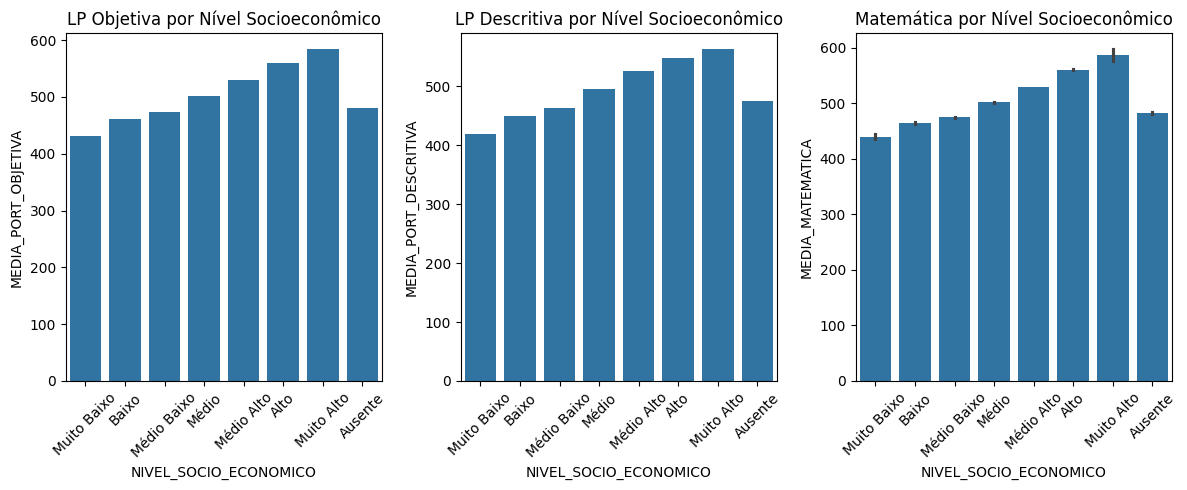

In [ ]:


# Lista ordenada com **todas** as categorias presentes
ordem_niveis = [
    'Muito Baixo', 'Baixo', 'Médio Baixo', 'Médio',
    'Médio Alto', 'Alto', 'Muito Alto', 'Ausente'
]

plt.figure(figsize=(12, 5))

# Gráfico 1 – Língua Portuguesa Objetiva
plt.subplot(1, 3, 1)
sns.barplot(
    data=dados,
    x='NIVEL_SOCIO_ECONOMICO',
    y='MEDIA_PORT_OBJETIVA',
    order=ordem_niveis,
    errorbar=None  # desativa linhas de erro para não poluir
)
plt.title('LP Objetiva por Nível Socioeconômico')
plt.xticks(rotation=45)

# Gráfico 2 – Língua Portuguesa Descritiva
plt.subplot(1, 3, 2)
sns.barplot(
    data=dados,
    x='NIVEL_SOCIO_ECONOMICO',
    y='MEDIA_PORT_DESCRITIVA',
    order=ordem_niveis,
    errorbar=None
)
plt.title('LP Descritiva por Nível Socioeconômico')
plt.xticks(rotation=45)

# Gráfico 3 – Matemática
plt.subplot(1, 3, 3)
sns.barplot(data=dados, x='NIVEL_SOCIO_ECONOMICO', y='MEDIA_MATEMATICA', order=ordem_niveis)
plt.title('Matemática por Nível Socioeconômico')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





Resultado Hipótese 1 – Os gráficos mostram claramente que o maior nível socioeconômico está diretamente relacionado à média nas 3 matérias. Quanto maior o nível socioeconômico, maiores as médias. Considerando que o número de escolas que não informaram o nível socioeconômico é expressivo, passaremos a verificar a relação entre a região e o grupo "Ausente", bem como sua distribuição por localização, a fim de obter algum insight.

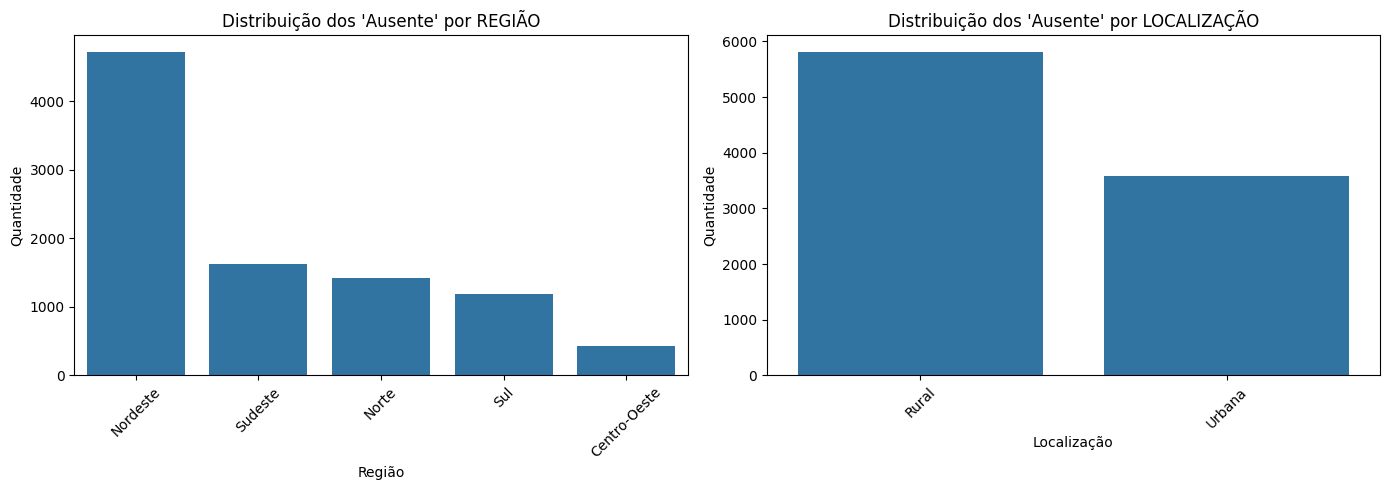

In [ ]:


# Filtrar os registros com "Ausente"
ausentes = dados[dados['NIVEL_SOCIO_ECONOMICO'] == 'Ausente']

# Criar os gráficos
plt.figure(figsize=(14, 5))

# Gráfico 1 – Distribuição dos 'Ausente' por REGIÃO
plt.subplot(1, 2, 1)
sns.countplot(data=ausentes, x='REGIAO', order=ausentes['REGIAO'].value_counts().index)
plt.title("Distribuição dos 'Ausente' por REGIÃO")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)

# Gráfico 2 – Distribuição dos 'Ausente' por LOCALIZAÇÃO
plt.subplot(1, 2, 2)
sns.countplot(data=ausentes, x='LOCALIZACAO', order=ausentes['LOCALIZACAO'].value_counts().index)
plt.title("Distribuição dos 'Ausente' por LOCALIZAÇÃO")
plt.xlabel("Localização")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



O predomínio da região Nordeste e de escolas na zona rural, dentre as que não informaram o nível socioeconômico dos alunos, pode indicar certa vulnerabilidade ou dificuldade de acesso às famílias. Isso demonstra, indiretamente considerando a nota do grupo, uma maior necessidade de apoio do poder público nessas regiões e localidades.

### 6.2. Hipotese 2

A localização da escola (urbana ou rural) influencia o desempenho dos alunos.

Nesta hipótese, avaliamos se a localização da escola (urbana ou rural) tem influência significativa nas médias de desempenho dos alunos. A suposição é que escolas urbanas tendem a apresentar melhores resultados, seja por estrutura, acesso ou outros fatores.
Utilizaremos gráficos de dispersão para visualizar o comportamento nas três áreas avaliadas: LP Objetiva, LP Descritiva e Matemática.

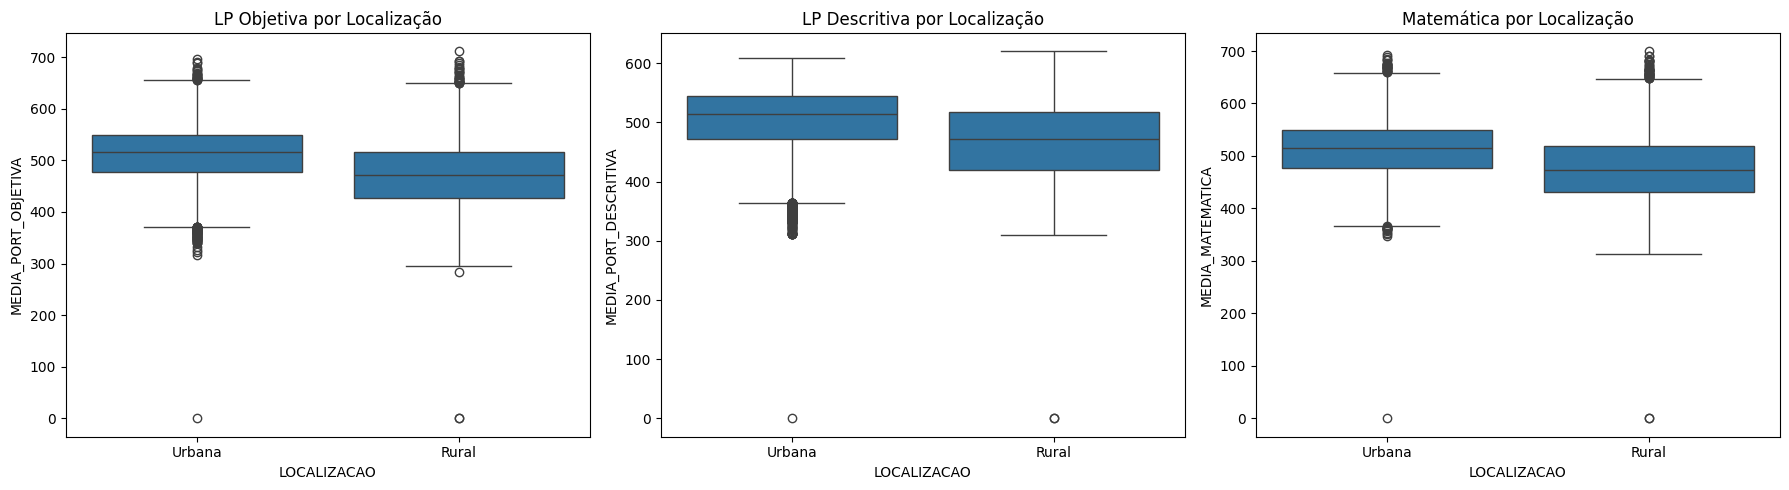

In [ ]:
plt.figure(figsize=(18, 5))

# LP Objetiva
plt.subplot(1, 3, 1)
sns.boxplot(data=dados, x='LOCALIZACAO', y='MEDIA_PORT_OBJETIVA')
plt.title('LP Objetiva por Localização')

# LP Descritiva
plt.subplot(1, 3, 2)
sns.boxplot(data=dados, x='LOCALIZACAO', y='MEDIA_PORT_DESCRITIVA')
plt.title('LP Descritiva por Localização')

# Matemática
plt.subplot(1, 3, 3)
sns.boxplot(data=dados, x='LOCALIZACAO', y='MEDIA_MATEMATICA')
plt.title('Matemática por Localização')

plt.tight_layout()
plt.show()


Resultado Hipótese 2 – Os gráficos de barras já indicavam que alunos da zona rural têm médias mais baixas. Mas os boxplots mostram mais: além da média menor, as notas são mais dispersas nas escolas rurais, com maior presença de alunos tirando notas bem baixas.

Nas escolas urbanas, as notas são mais concentradas no meio, com menos variação. Isso mostra que a diferença entre rural e urbano é maior do que parece, não é só a média: tem mais desigualdade no desempenho dos alunos da zona rural.

Ou seja, as escolas rurais não só têm notas menores, elas também têm mais alunos em situação crítica.

Por outro lado, observa-se a presença de alunos com desempenho significativamente inferior à média nas áreas urbanas, o que pode indicar a existência de bolsões de vulnerabilidade mesmo em regiões com maior infraestrutura

### Hipótese 3

Escolas com maior percentual de professores com formação adequada têm melhores médias de desempenho?

Agora vamos investigar se a formação dos professores influencia o desempenho dos alunos. Para isso, vamos cruzar o percentual de professores formados (FORM_DOCENTE_PERC) com as médias em Língua Portuguesa e Matemática.

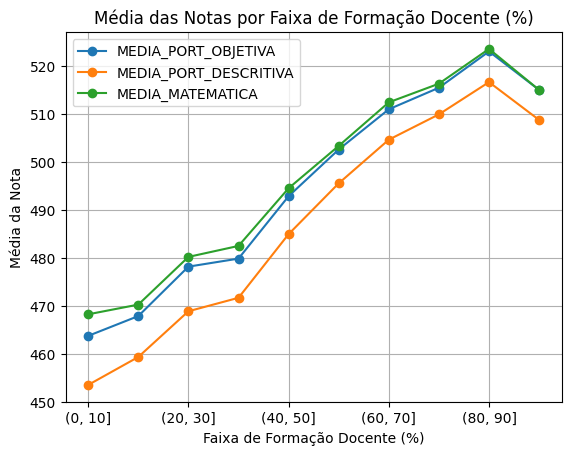

In [ ]:
# Criar faixas de formação docente
dados['faixa_formacao'] = pd.cut(dados['FORM_DOCENTE_PERC'], bins=range(0, 110, 10))

# Calcular médias por faixa
medias = dados.groupby('faixa_formacao')[['MEDIA_PORT_OBJETIVA', 'MEDIA_PORT_DESCRITIVA', 'MEDIA_MATEMATICA']].mean()

# Plotar gráfico
medias.plot(marker='o')
plt.title('Média das Notas por Faixa de Formação Docente (%)')
plt.xlabel('Faixa de Formação Docente (%)')
plt.ylabel('Média da Nota')
plt.grid(True)
plt.show()

Resultado Hipotese 3 - Podemos inferir que existe uma moderada relação entre a média de notas dos alunos e formação docente.

Hipotese 4  – Nível Socioeconômico e Formação Docente

Escolas com maior nível socioeconômico contam com professores com formação mais adequada:

Após analisarmos o desempenho dos alunos por nível socioeconômico e por localização, investigamos agora se há relação entre o nível socioeconômico da escola e a formação dos professores. Se a resposta for sim, isso pode indicar uma desigualdade dupla — alunos mais carentes com menos estrutura e menos apoio docente.


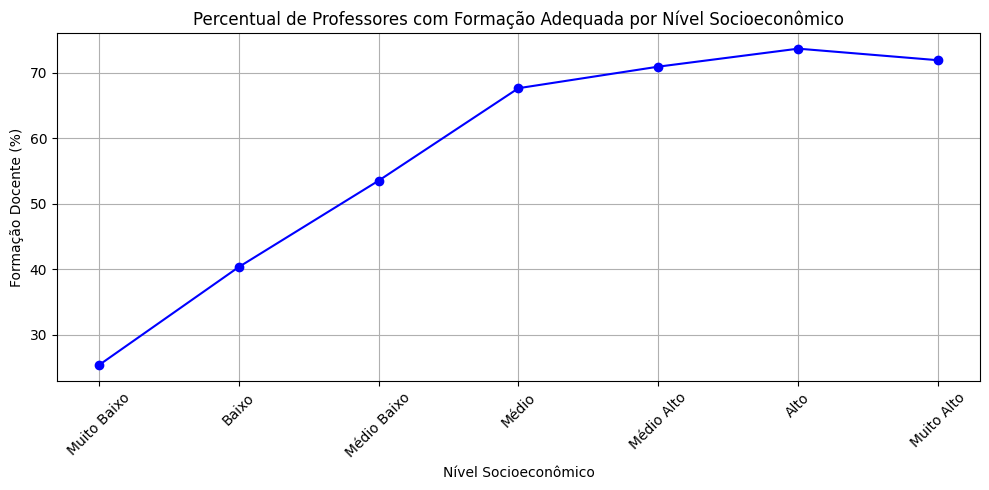

In [ ]:
# Agrupamento por nível socioeconômico com média do percentual de professores
df_plot = dados.groupby('NIVEL_SOCIO_ECONOMICO')['FORM_DOCENTE_PERC'].mean().reindex([
    'Muito Baixo', 'Baixo', 'Médio Baixo', 'Médio',
    'Médio Alto', 'Alto', 'Muito Alto'
])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot.index, df_plot.values, marker='o', linestyle='-', color='blue')
plt.title('Percentual de Professores com Formação Adequada por Nível Socioeconômico')
plt.xlabel('Nível Socioeconômico')
plt.ylabel('Formação Docente (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Resultado Hipótese 4 - A correlação entre nível socioeconômico e formação docente é mais forte nas faixas mais baixas. Escolas de nível "Muito Baixo" até "Médio Baixo" apresentam os menores percentuais de professores com formação adequada. A partir do nível "Médio", os percentuais se estabilizam, indicando menor variação entre as escolas com melhores condições.

##7. Conclusão Geral

A análise dos dados confirmou todas as hipóteses propostas:

Hipótese 1: Alunos de escolas com maior nível socioeconômico apresentaram médias mais altas em Língua Portuguesa e Matemática.

Hipótese 2: Escolas urbanas superaram as rurais em desempenho médio e apresentaram menor dispersão nas notas.

Hipótese 3: Escolas com maior percentual de professores com formação adequada obtiveram melhores resultados.

Hipótese 4: Verificou-se que o percentual de formação docente tende a aumentar conforme o nível socioeconômico das escolas.

 Observou-se que escolas com maior nível socioeconômico e professores com melhor formação apresentam desempenho superior. Além disso, escolas localizadas em áreas urbanas tendem a ter resultados mais consistentes. Essas evidências reforçam a importância de políticas públicas voltadas à redução das desigualdades educacionais, especialmente em regiões rurais e com menor infraestrutura.